In [112]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [113]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [114]:
bc.target.shape

(569,)

In [115]:
bc.data.shape

(569, 30)

Preprocessing

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [117]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[0.27445691, 0.22928644, 0.2596918 , ..., 0.20213058, 0.16124581,
        0.05942542],
       [0.29480808, 0.52553263, 0.27855711, ..., 0.20635739, 0.17327025,
        0.08421881],
       [0.25363245, 0.17720663, 0.23840785, ..., 0.1647079 , 0.14449044,
        0.03082776],
       ...,
       [0.3336173 , 0.3902604 , 0.31787713, ..., 0.27364261, 0.13029765,
        0.13859373],
       [0.32273179, 0.2056138 , 0.32229977, ..., 0.47525773, 0.20185295,
        0.31457431],
       [0.31610583, 0.18397024, 0.30737337, ..., 0.36219931, 0.35915632,
        0.27115309]], shape=(455, 30))

In [119]:
x_test

array([[0.21482323, 0.30571525, 0.20420151, ..., 0.21704467, 0.34318943,
        0.10048537],
       [0.22996829, 0.31214068, 0.21919701, ..., 0.23756014, 0.19120836,
        0.16325594],
       [0.47465569, 0.35678052, 0.45546265, ..., 0.3766323 , 0.33707865,
        0.06329529],
       ...,
       [0.34450282, 0.28610078, 0.32775897, ..., 0.25876289, 0.21111768,
        0.1424636 ],
       [0.37337309, 0.23537369, 0.37903393, ..., 0.69656357, 0.39818648,
        0.33753116],
       [0.13232997, 0.24619547, 0.12929307, ..., 0.18329897, 0.19081411,
        0.19441165]], shape=(114, 30))

# Classification

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    per = precision_score(y_test, y_pred_test)
    rec = recall_score(y_test, y_pred_test)
    print(f"acc_train:{acc_train} and acc_test:{acc_test} and precision:{per} and recall:{rec}")
    return acc_train, acc_test, per, rec

1. Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

,priors,None
,var_smoothing,1e-09


In [122]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
acc_train_gnb, acc_test_gnb, per_gnb, rec_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9274725274725275 and acc_test:0.9298245614035088 and precision:0.9516129032258065 and recall:0.921875


2. KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)
acc_train_knn, acc_test_knn, per_knn, rec_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9714285714285714 and acc_test:0.9736842105263158 and precision:0.9552238805970149 and recall:1.0


3. Decision tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=100,min_samples_split=4)
tree.fit(x_train, y_train)
y_pred_train = tree.predict(x_train)
y_pred_test = tree.predict(x_test)
acc_train_tree, acc_test_tree, per_tree, rec_tree = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:1.0 and acc_test:0.9298245614035088 and precision:0.9666666666666667 and recall:0.90625


4. Random forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000,max_depth=32,min_samples_split=8)
forest.fit(x_train, y_train)
y_pred_train = forest.predict(x_train)
y_pred_test = forest.predict(x_test)
acc_train_forest, acc_test_forest, per_forest, rec_forest = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9934065934065934 and acc_test:0.9824561403508771 and precision:0.9696969696969697 and recall:1.0


5. SVM

In [126]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_svm, acc_test_svm, per_svm, rec_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9846153846153847 and acc_test:0.9649122807017544 and precision:0.96875 and recall:0.96875


6. Logistic regression

In [127]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
acc_train_lr, acc_test_lr, per_lr, rec_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9626373626373627 and acc_test:0.9912280701754386 and precision:0.9846153846153847 and recall:1.0


7. ANN

In [128]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=1024, activation='relu',solver='adam')
ann.fit(x_train, y_train)
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ann, acc_test_ann, per_ann, rec_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train:0.9868131868131869 and acc_test:0.9912280701754386 and precision:0.9846153846153847 and recall:1.0


C:\Users\me.soleymani\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparison

<BarContainer object of 7 artists>

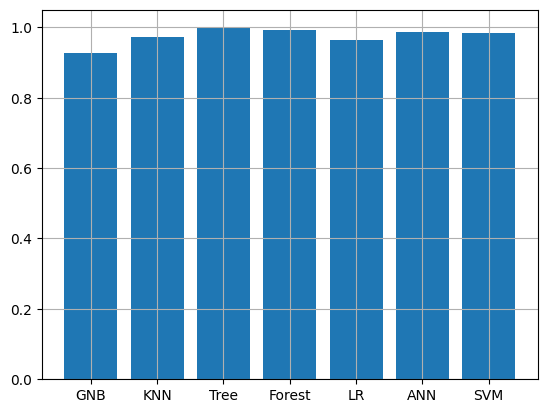

In [129]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_tree, acc_train_forest, acc_train_lr, acc_train_ann, acc_train_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, acc_train)

<BarContainer object of 7 artists>

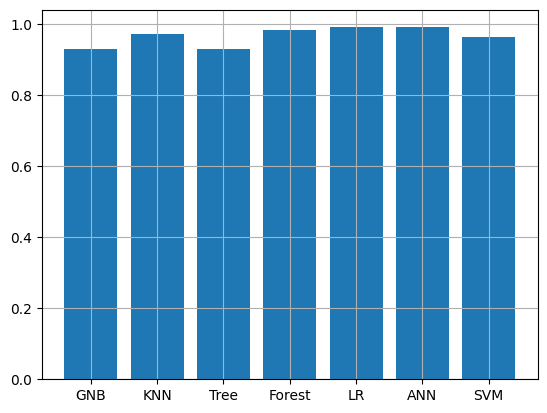

In [130]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_tree, acc_test_forest, acc_test_lr, acc_test_ann, acc_test_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, acc_test)

<BarContainer object of 7 artists>

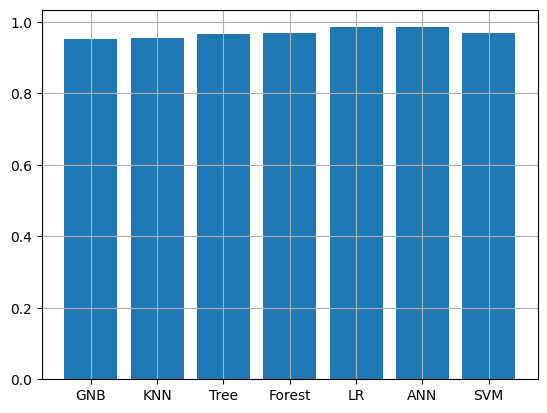

In [131]:
per = [per_gnb, per_knn, per_tree, per_forest, per_lr, per_ann, per_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, per)

<BarContainer object of 7 artists>

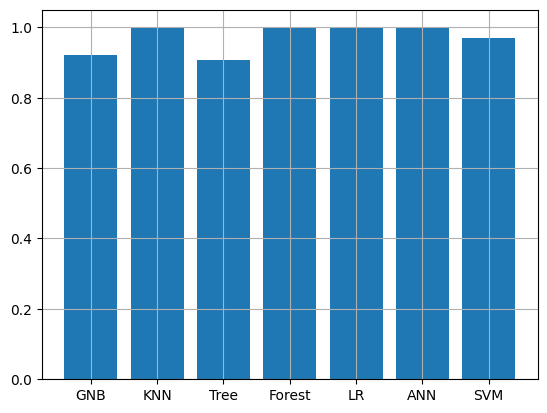

In [132]:
rec = [ rec_gnb, rec_knn, rec_tree, rec_forest, rec_lr, rec_ann, rec_svm]
title = ["GNB","KNN","Tree","Forest","LR","ANN","SVM"]
plt.grid()
plt.bar(title, rec)